In [1]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import cv2
import SimpleITK as sitk
import os

array([-2000,     0,     1, ...,  1473,  1475,  1480], dtype=int16)

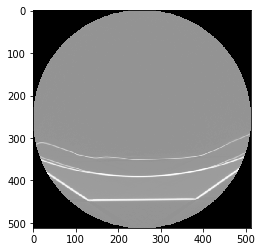

In [4]:
img = pydicom.read_file('D:\\dataset_seg\\LUMBAR_PHANTOM_(HFP)\\Series_3\\1.2.840.113619.2.55.3.2831202049.807.1552703418.782.1.dcm')
plt.imshow(img.pixel_array, cmap="gray")
np.unique(img.pixel_array)

In [3]:
itkImg = sitk.ReadImage('D:\\dataset_seg\\LUMBAR_PHANTOM_(HFP)\\Series_3\\1.2.840.113619.2.55.3.2831202049.807.1552703418.782.1.dcm')
itkImg.GetSpacing()

(0.736328, 0.736328, 1.0)

In [6]:
img

(0008, 0000) Group Length                        UL: 482
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20190316'
(0008, 0013) Instance Creation Time              TM: '132309'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.55.3.2831202049.807.1552703418.782.1
(0008, 0020) Study Date                          DA: '20190316'
(0008, 0021) Series Date                         DA: '20190316'
(0008, 0022) Acquisition Date                    DA: '20190316'
(0008, 0023) Content Date                        DA: '20190316'
(0008, 0030) Study Time                          TM: '131939'
(0008, 0031) Series Time                         TM: '132251'
(0008, 0032) Acquisition Time                    TM: '132307.637231'
(0008, 0033) Content Time              

In [17]:
baseDir = "D:\\dataset_seg\\data_2\\"
for i in range(585):
    image = cv2.imread(baseDir + "1.2.840.113619.2.55.3.2831202049.807.1552703418.782." + str(i+1) + ".png")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(baseDir + "1.2.840.113619.2.55.3.2831202049.807.1552703418.782." + str(i+1) + ".png", image)
#plt.imshow(image, cmap="gray")

In [13]:
spacing = (img.PixelSpacing[0], img.PixelSpacing[1], 1.0)
itkImg = sitk.ReadImage('D:\\dataset_seg\\data_2\\phantom_results.mhd')
itkImg.SetSpacing(spacing)
sitk.WriteImage(itkImg, 'D:\\dataset_seg\\data_2\\phantom_results.mhd')

In [62]:
compImg = np.ones((585,512,512))
for i in range(585):
    img = pydicom.read_file('D:\\dataset_seg\\LUMBAR_PHANTOM_(HFP)\\Series_3\\1.2.840.113619.2.55.3.2831202049.807.1552703418.782.' + str(i+1) + '.dcm')
    compImg[i] = img.pixel_array

In [63]:
def convertToGrayScaleRange(image, m):
    OldRange = (m - (-2000))  
    NewRange = (255 - 0)  
    new_img = np.array(image)
    new_img = (((image - (-2000)) * NewRange) / OldRange) + 0
    return new_img

In [64]:
idir = "D:\\dataset_seg\\LUMBAR_PHANTOM_(HFP)\\Series_3\\"
odir = "D:\\dataset_seg\\data_2\\train_yz\\"
#odir = "D:\\"
m = 0
for i in range(512):
    image = compImg[:, :, i]
    if max(np.unique(image)) > m:
        m = max(np.unique(image))
m

4095.0

In [65]:
#plt.imshow(img, cmap="gray")
for i in range(512):
    img = np.array(compImg[:, :, i])
    img = convertToGrayScaleRange(img, m)
    ind = str(i)
    ind = "0"*(3 - len(ind)) + ind
    cv2.imwrite(odir + "image_z_" + ind + ".png", img)

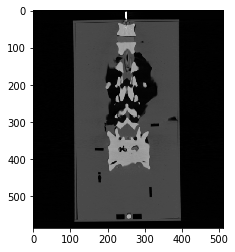

In [68]:
plt.imshow(compImg[:, 256, :], cmap="gray")

In [2]:
#TestImgs
testBase = 'D:\\dataset_seg\\Phantom_test_data\\SE00006\\'
compTest = []
for file in os.listdir(testBase):
    img = pydicom.read_file(testBase + file)
    compTest.append(img.pixel_array)
compTest = np.array(compTest)
compTest.shape

(446, 512, 512)

In [7]:
t = sitk.ReadImage('D:\\dataset_seg\\Phantom_test_data\\SE00006\\IM00001')
t.GetOrigin()

(111.208, 111.2081, -989.5)

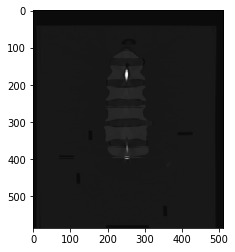

In [96]:
#np.unique(compTest[:, 256, :])
plt.imshow(cv2.resize(compTest[:, 290, :], (512,585)), cmap="gray")

In [83]:
odir = "D:\\dataset_seg\\data_2\\test_yz\\"
#odir = "D:\\"
m = 0
for i in range(512):
    image = compTest[:, i, :]
    if max(np.unique(image)) > m:
        m = max(np.unique(image))
m

30053

In [112]:
compTest[:, 256, :]

array([[-1006, -1005, -1003, ..., -1001, -1002, -1004],
       [-1003, -1001, -1001, ..., -1001, -1003, -1005],
       [-1002, -1001, -1001, ..., -1001, -1002, -1002],
       ...,
       [ -968,  -967,  -968, ...,  -980,  -980,  -982],
       [ -973,  -969,  -972, ...,  -986,  -987,  -987],
       [ -973,  -968,  -970, ...,  -990,  -988,  -986]], dtype=int16)

In [215]:
m = 0
for i in range(512):
    image = compTest[:, i, :]
    if max(np.unique(image)) > m:
        m = max(np.unique(image))
print(m)
mi = 50000
for i in range(512):
    image = compTest[:, i, :]
    if min(np.unique(image)) < mi:
        mi = min(np.unique(image))
print(mi)

30053
-4032


In [210]:
int(m) - int(mi)

34085

In [227]:
m = max(np.unique(compTest[:, 209, :]))
mi = min(np.unique(compTest[:, 209, :]))
m, mi

(2273, -2048)

In [225]:
def convertToGrayScaleRangeTest(image, m, mi):
    OldRange = (int(m) - int(mi))  
    NewRange = 255 
    #print(OldRange, NewRange)
    new_img = np.array(image, dtype=np.float64)
    #print((((image[256] - (mi)) * NewRange) / OldRange) + 0)
    new_img = (((new_img - (mi)) * NewRange) / OldRange) + 0
    n = np.unique((new_img-mi))
    #print(np.unique(n*NewRange/OldRange))
    #print(n.dtype)
    return new_img

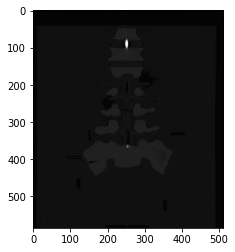

In [226]:
odir = "D:\\dataset_seg\\data_2\\test_yz\\"
#plt.imshow(img, cmap="gray")
tmpRes = np.ones((512, 585, 512))
for i in range(512):
    img = np.array(compTest[:, i, :], dtype=np.float64) 
    #m = max(np.unique(img)); mi = min(np.unique(img))
    img = convertToGrayScaleRangeTest(img, m, mi)
    img = cv2.resize(img, (512, 585))
    tmpRes[i] = img
    ind = str(i)
    ind = "0"*(3 - len(ind)) + ind
    cv2.imwrite(odir + "image_y_" + ind + ".png", img)
plt.imshow(tmpRes[256], cmap="gray")  
#np.unique(tmpRes[256])

In [220]:
#Contrast Stretching (inefficient!)

img1 = tmpRes[256]
# Create zeros array to store the stretched image
minmax_img = np.zeros((img1.shape[0],img1.shape[1]),dtype = 'uint8')
 
# Loop over the image and apply Min-Max formulae
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        minmax_img[i,j] = 255*(img1[i,j]-np.min(img1))/(np.max(img1)-np.min(img1))

True

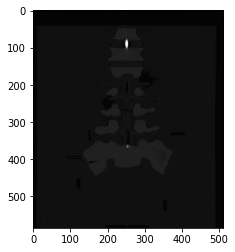

In [222]:
plt.imshow(img1, cmap="gray")
cv2.imwrite("D:\\test.png", img1)

In [245]:
from PIL import ImageEnhance, Image

img = np.array(compTest[:, 256, :])
image = np.array(img)
mi = min(np.unique(image))
m = max(np.unique(image)) 
print(m, mi)
img = convertToGrayScaleRangeTest(img, m, mi)

#plt.imshow(img, cmap="gray")
#print(np.unique(img))
#print(np.unique(compTest[:, 256, :]))
cv2.imwrite("D:\\test.png", img)

22622 -1377


True

In [246]:
img = Image.open("D:\\test.png")
enhancer = ImageEnhance.Brightness(img)
img = enhancer.enhance(6.5)
img.save("D:\\test.png")

In [70]:
tmp = compImg[:, 256, :]
tmp.shape
np.transpose(tmp, (1,0)).shape

(512, 585)

In [95]:
img = np.array(compTest[:, 256, :])
img = convertToGrayScaleRangeTest(img, m, mi)
np.unique(img)

array([-1.01975016, -1.01728918, -1.01725803, ...,  1.01660384,
        1.016635  ,  1.01666615])

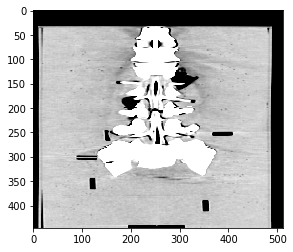

In [99]:
allImgs = []
pngDir = "D:\\dataset_seg\\data_2\\test_yz\\" 
for file in os.listdir(pngDir):
    img = cv2.imread(pngDir + file, cv2.IMREAD_GRAYSCALE)
    allImgs.append(img)
allImgs = np.array(allImgs)
plt.imshow(allImgs[:, 256, :], cmap="gray")    

In [101]:
odir = "D:\\dataset_seg\\data_2\\test_yz\\"
for i in range(512):
    img = np.array(allImgs[:, i, :])
    img = cv2.resize(img, (512, 585))
    ind = str(i)
    ind = "0"*(3 - len(ind)) + ind
    cv2.imwrite(odir + "image_y_" + ind + ".png", img)

In [12]:
t = sitk.ReadImage('D:\\dataset_seg\\Phantom_test_data\\SE00006\\IM00001')
t.GetOrigin()
final = sitk.ReadImage('D:\\dataset_seg\\data_2\\phantom_results_yz.mhd')
final.SetOrigin(t.GetOrigin())
sitk.WriteImage(final, 'D:\\dataset_seg\\data_2\\phantom_results_yz.mhd')